<a href="https://colab.research.google.com/github/subhra01/Python_Project_DS/blob/main/Social_media_sentiment_analysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: TECHNOHACKS EDUTECH.
*(Internship Program 2023, Batch-7)*


*  Author: Subhradyuti Jana (Data science intern)


>



Problem Statement: Use a dataset of tweets or Facebook posts andper form **sentiment analysis** to determine the
overall sentiment of the posts.

In [ ]:
#IMPORT LIBRARIES
import pandas as pd
import nltk
import re

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# PREPROCESSING

In [22]:
# Load the dataset
data = pd.read_csv('/content/Tweets.csv')

# Select the 'text' column for preprocessing
text_column = 'text'

# Remove noise and irrelevant information
data[text_column] = data[text_column].apply(lambda x: re.sub(r"http\S+|www\S+|@\S+|#\S+", "", x))

# Lowercase the text
data[text_column] = data[text_column].str.lower()

# Tokenization
data['tokens'] = data[text_column].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['tokens'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Print the preprocessed dataset
print(data.head())

       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.700000e+17           neutral                        1.0000   
1  5.700000e+17          positive                        0.3486   
2  5.700000e+17           neutral                        0.6837   
3  5.700000e+17          negative                        1.0000   
4  5.700000e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN            

# SENTIMENTCLASSIFICATION

In [26]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each tweet
dataset['sentiment_score'] = dataset['tokens'].apply(lambda x: sia.polarity_scores(' '.join(x))['compound'])

# Classify sentiment based on the sentiment score
dataset['sentiment'] = dataset['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Print the updated dataset
print(dataset[['text', 'sentiment']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                    text sentiment
0                                            what  said.   neutral
1       plus you've added commercials to the experien...   neutral
2       i didn't today... must mean i need to take an...   neutral
3       it's really aggressive to blast obnoxious "en...  negative
4               and it's a really big bad thing about it  negative
...                                                  ...       ...
14635   thank you we got on a different flight to chi...  positive
14636   leaving over 20 minutes late flight. no warni...  negative
14637                 please bring american airlines to   positive
14638   you have my money, you change my flight, and ...  positive
14639   we have 8 ppl so we need 2 know how many seat...  positive

[14640 rows x 2 columns]


# SENTIMENT DISTRIBUTION VISUALIZATION

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


Count the occurrences of each sentiment category



In [52]:
sentiment_counts = dataset['sentiment'].value_counts()

Create a bar chart


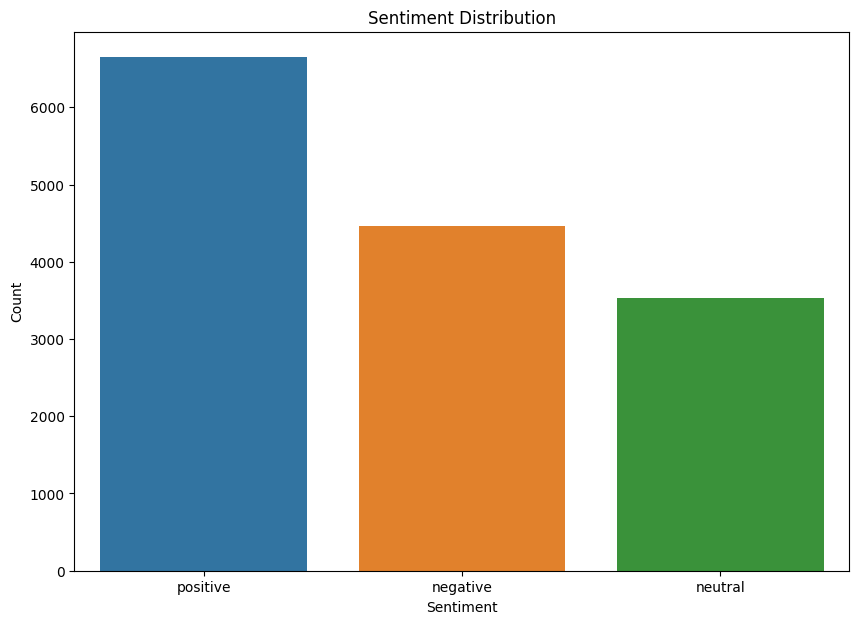

In [53]:
plt.figure(figsize = (10, 7))
sns.barplot(x = sentiment_counts.index, y = sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#SENTIMENT PROPORTIONS:

In [40]:
import matplotlib.pyplot as plt

Calculate the total number of tweets

In [41]:
total_tweets = len(dataset)

Calculate the sentiment proportions

In [42]:
sentiment_proportions = dataset['sentiment'].value_counts() / total_tweets

Create a pie chart

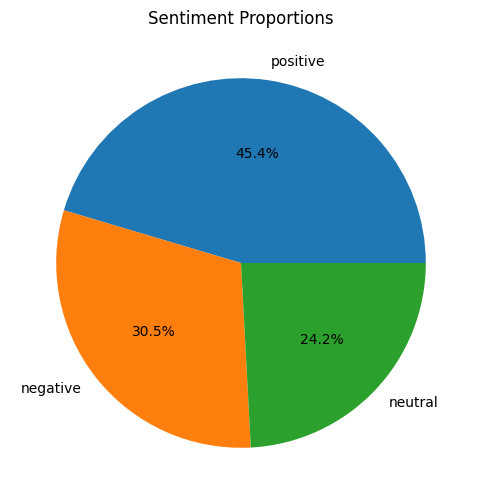

In [43]:
plt.figure(figsize=(8, 6))
plt.pie(sentiment_proportions.values, labels=sentiment_proportions.index, autopct='%1.1f%%')
plt.title('Sentiment Proportions')
plt.show()

Create a bar chart

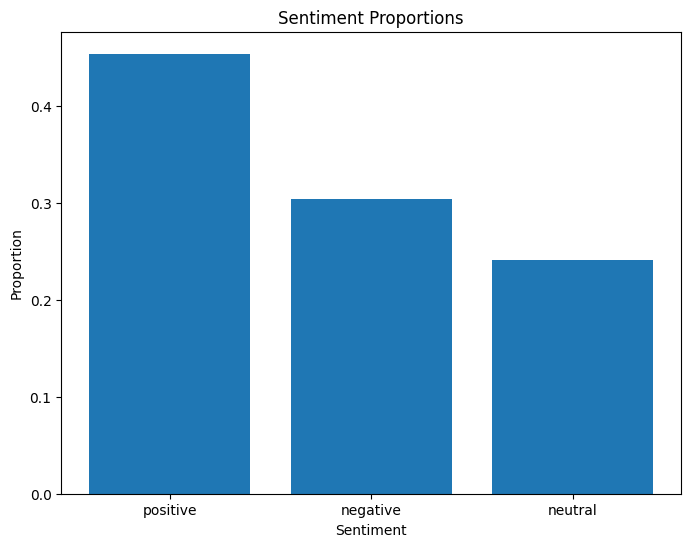

In [36]:
plt.figure(figsize=(8, 6))
plt.bar(sentiment_proportions.index, sentiment_proportions.values)
plt.title('Sentiment Proportions')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.show()

# EXPLORE WORD CLOUDS

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

Count the occurrences of each sentiment category


In [45]:
sentiment_counts = dataset['airline_sentiment'].value_counts()

Create a bar chart

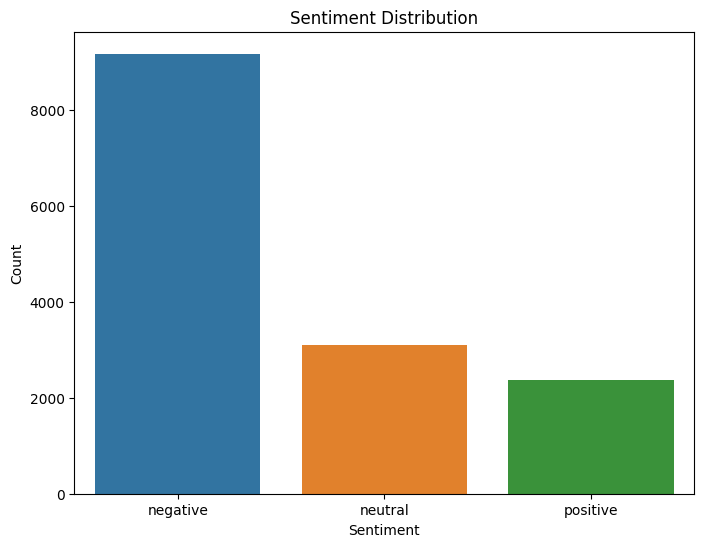

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Total Number of tweets

In [47]:
total_tweets = len(dataset)

Calculat sentiment proportions


In [48]:
sentiment_proportions = dataset['airline_sentiment'].value_counts() / total_tweets

Create a Pie Chart

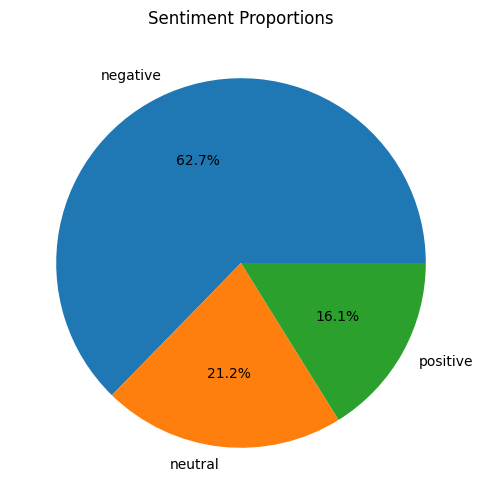

In [49]:
plt.figure(figsize=(8, 6))
plt.pie(sentiment_proportions.values, labels=sentiment_proportions.index, autopct='%1.1f%%')
plt.title('Sentiment Proportions')
plt.show()

Create a Bar Chart

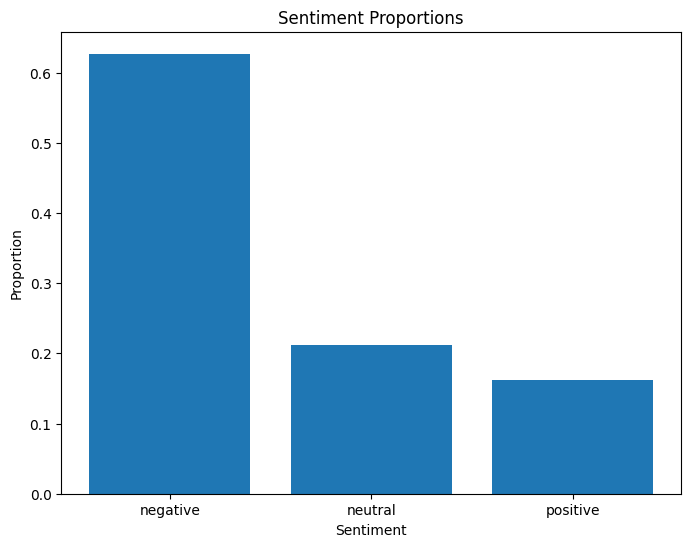

In [50]:
plt.figure(figsize=(8, 6))
plt.bar(sentiment_proportions.index, sentiment_proportions.values)
plt.title('Sentiment Proportions')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.show()

In [54]:

print(dataset.columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'tokens', 'sentiment_score',
       'sentiment'],
      dtype='object')


# Aspect-Based Sentiment Analysis

In [55]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

Create a SentimentIntensityAnalyzer object

In [56]:
sia = SentimentIntensityAnalyzer()

Example function to determine sentiment using SentimentIntensityAnalyzer

In [57]:
def determine_sentiment(tokens):
    sentiment_scores = sia.polarity_scores(' '.join(tokens))
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

Define aspects of interest

In [58]:
aspects = ['service', 'price', 'quality', 'delivery']

Initialize sentiment scores for each aspect

In [59]:
aspect_sentiments = {aspect: {'positive': 0, 'negative': 0} for aspect in aspects}

Perform sentiment analysis for each tweet

In [60]:
for tokens in dataset['tokens']:
    mentioned_aspects = [aspect for aspect in aspects if aspect in tokens]
    for aspect in mentioned_aspects:
        sentiment = determine_sentiment(tokens)
        if sentiment == 'positive':
            aspect_sentiments[aspect]['positive'] += 1
        elif sentiment == 'negative':
            aspect_sentiments[aspect]['negative'] += 1

**Print the aspect sentiment scores**


*   These counts provide an indication of the sentiment associated with each aspect mentioned in the tweets.





In [61]:
for aspect, sentiment_scores in aspect_sentiments.items():
    print(f"Aspect: {aspect}")
    print(f"Positive count: {sentiment_scores['positive']}")
    print(f"Negative count: {sentiment_scores['negative']}")
    print()

Aspect: service
Positive count: 391
Negative count: 432

Aspect: price
Positive count: 24
Negative count: 17

Aspect: quality
Positive count: 12
Negative count: 1

Aspect: delivery
Positive count: 7
Negative count: 7



Reasons Of Negative Tweets

Reasons Of Negative Tweets : green
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


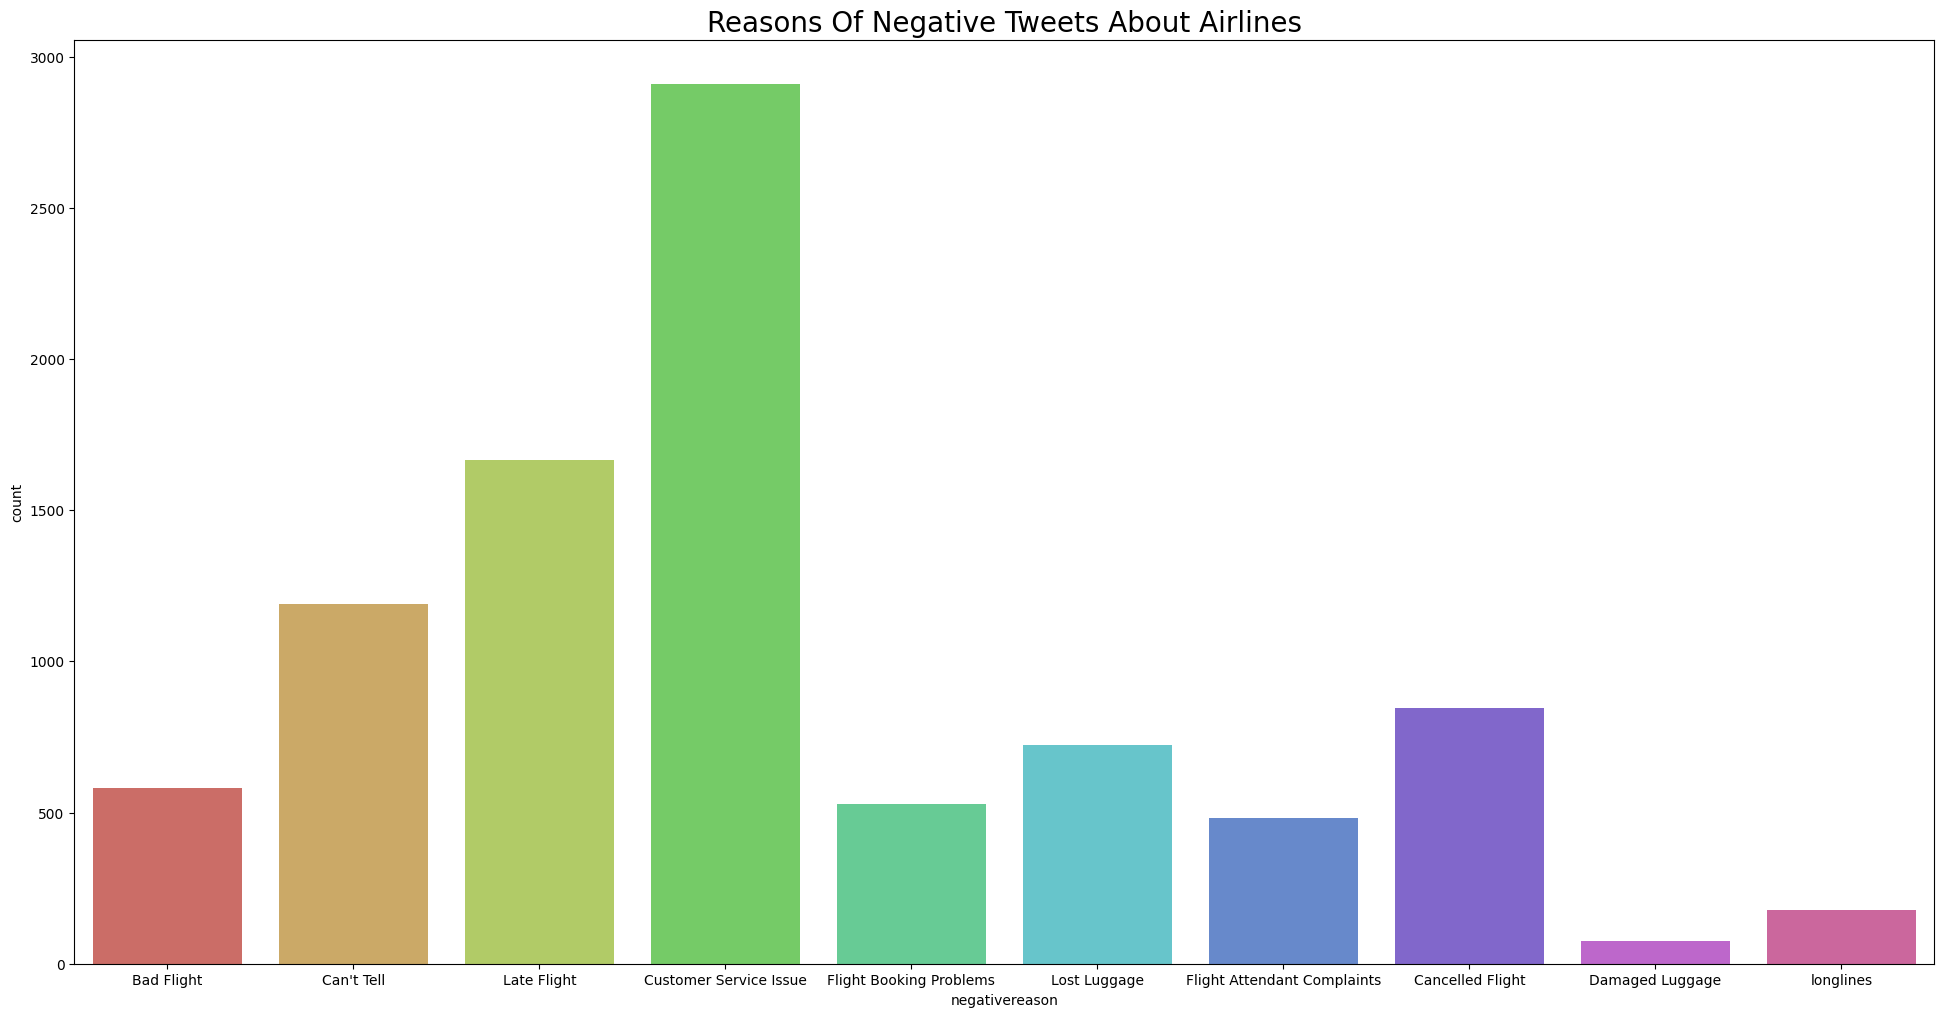

In [64]:
print('Reasons Of Negative Tweets :','green')
print(dataset.negativereason.value_counts())

plt.figure(figsize = (24, 12))
sns.countplot(x = 'negativereason', data = dataset, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

World cloud of Negative sentiments

In [69]:
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer
from wordcloud import WordCloud

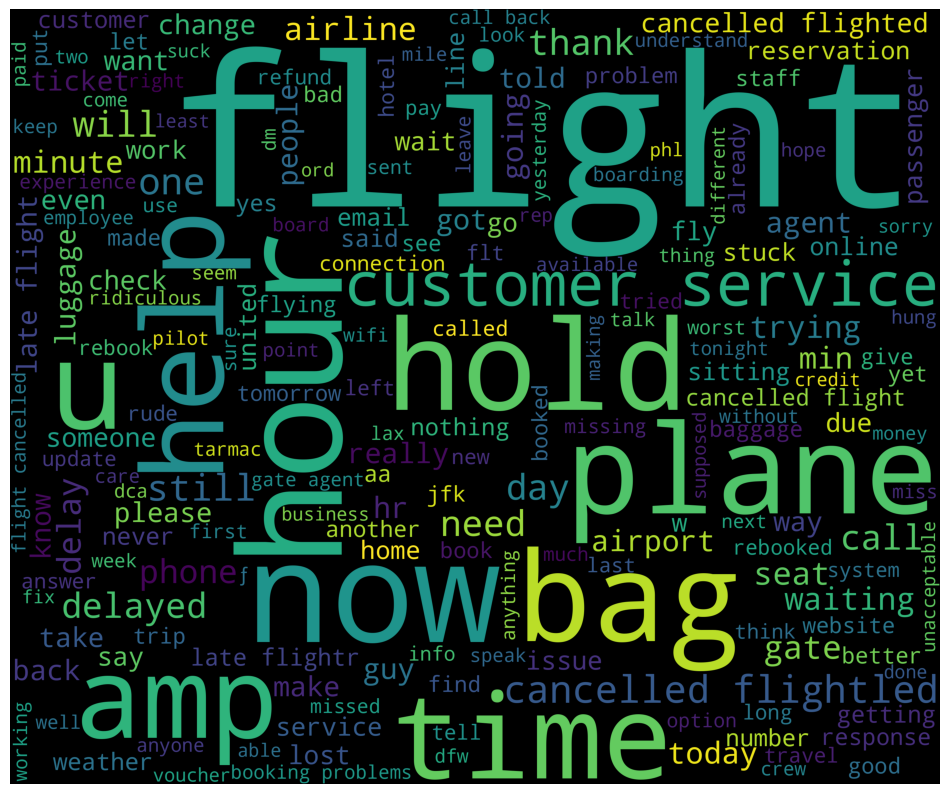

In [70]:
new_dataset=dataset[dataset['airline_sentiment']=='negative']
words = ' '.join(new_dataset['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()